# <center> Gold Price Prediction

## Import Libraries

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Task 1: Initial Data Exploration

In [50]:
#loading the csv file 
df = pd.read_csv('gold_price.csv')
df.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [51]:
#number of rows and columns
df.shape

(4718, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4718 non-null   object 
 1   USD (AM)   4718 non-null   float64
 2   USD (PM)   4682 non-null   float64
 3   GBP (AM)   4718 non-null   float64
 4   GBP (PM)   4682 non-null   float64
 5   EURO (AM)  4718 non-null   float64
 6   EURO (PM)  4682 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.1+ KB


In [53]:
# checking number of missing values
df.isnull().sum()

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [54]:
df.fillna(df.mean(), inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8268\2622515659.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [55]:
df.isnull().sum()

Date         0
USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

In [56]:
df.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000
mean,959.990812,959.728684,625.068432,624.921846,773.892791,773.843716
std,449.456217,447.768585,324.491391,323.303321,351.555806,350.352069
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000
25%,449.112500,453.600000,244.576750,246.826500,361.393500,364.767500
50%,1113.125000,1105.775000,717.145000,713.019500,874.354500,845.199500
75%,1293.750000,1293.037500,939.065500,937.662500,1085.967750,1085.337500
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000


In [57]:
correlation =df.corr()

<AxesSubplot:>

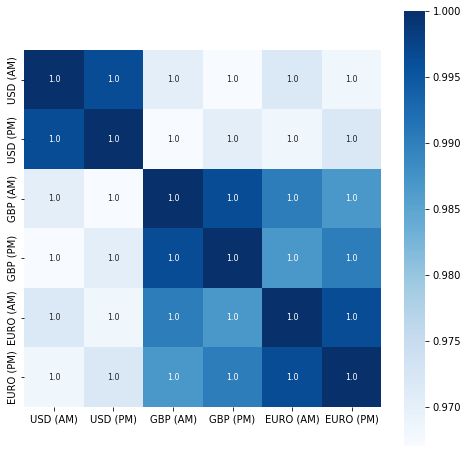

In [58]:
# constructing heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True , square=True, fmt ='.1f', annot=True ,  annot_kws= {'size':8}, cmap = 'Blues' )

In [59]:
print(correlation['USD (AM)'])

USD (AM)     1.000000
USD (PM)     0.996508
GBP (AM)     0.970433
GBP (PM)     0.967052
EURO (AM)    0.971767
EURO (PM)    0.968400
Name: USD (AM), dtype: float64


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='USD (AM)', ylabel='Density'>

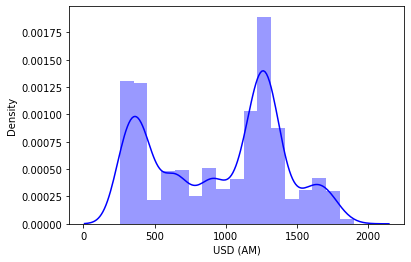

In [60]:
# checking distribution
sns.distplot(df['USD (AM)'], color = 'blue')

## Task 2: Create Train & Test Sets

In [61]:
# splitting features and target
X = df.drop(['Date','USD (AM)'], axis = 1)
Y = df['USD (AM)']

In [62]:
print(X)

      USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
0       271.10   183.026   181.617    288.677    287.334
1       267.15   178.916   177.390    281.823    281.655
2       267.10   178.869   178.352    282.538    282.049
3       267.40   178.488   178.148    280.775    280.882
4       268.30   178.769   178.664    282.410    282.481
...        ...       ...       ...        ...        ...
4713   1532.95  1250.910  1247.510   1378.970   1380.880
4714   1537.15  1263.310  1258.770   1389.890   1387.430
4715   1540.20  1260.510  1262.960   1387.290   1392.030
4716   1528.40  1253.140  1251.150   1382.750   1383.510
4717   1525.95  1260.420  1265.010   1388.690   1391.510

[4718 rows x 5 columns]


In [63]:
print(Y)

0        272.80
1        269.00
2        268.75
3        268.00
4        268.60
         ...   
4713    1531.85
4714    1541.75
4715    1536.65
4716    1526.55
4717    1523.35
Name: USD (AM), Length: 4718, dtype: float64


In [64]:
# splitting in training and testing data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

## Task 3: Develop Models & Predictions

In [65]:
# Model training: Random forest regressor
regressor = RandomForestRegressor(n_estimators = 100)

In [66]:
# model training
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
# prediction on Test data
test_data_prediction = regressor.predict(x_test)


In [68]:
print(test_data_prediction)

[1198.2865 1262.4435 1226.227  1206.712   949.15   1185.3965  425.409
 1199.462   423.8045  922.8025  266.2265  855.3525 1179.02    300.4905
 1303.76    281.5785  554.06    359.3175 1594.605  1177.5385  438.5285
 1697.575  1203.3485  333.362   283.2395  967.8765 1239.019   659.9005
  363.79    934.8775 1126.0515  911.8425  359.4935  569.9035 1776.465
  414.4865 1494.2065 1121.221  1648.3625 1119.796   397.064   300.3975
  395.1575 1653.6025 1286.7835 1281.977   272.403  1243.649  1094.309
 1576.725  1727.7725  401.77    427.4205 1222.2365 1122.833  1291.555
 1564.51   1366.86   1723.085   893.078  1519.279   922.7565 1091.775
  626.2825  402.4075  401.945   451.341   326.4665 1615.6875  472.574
 1290.4385  399.946  1394.856   267.4045  427.781   275.1115 1115.456
 1091.531  1272.637  1233.7805 1684.9675 1211.985  1293.712  1268.5595
 1302.7335  658.7935  806.1995 1332.06   1204.38   1233.258  1291.422
 1223.494  1130.0255  628.5295 1270.076   364.3345 1233.9125  971.483
  392.2365  344

In [69]:
# R squared error
error_score = metrics.r2_score(y_test , test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9997489308107471


Comparing actual and predicted values in plot

In [70]:
y_test = list(y_test)

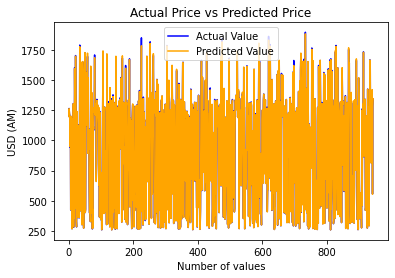

In [71]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('USD (AM)')
plt.legend()
plt.show()